In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics

In [2]:
books = pd.read_csv('/kaggle/input/bookdata/BooksDataSet.csv')
books.head()

,Unnamed: 0,book_id,book_name,genre,summary
0,0,3248537,Drowned Wednesday,Fantasy,Drowned Wednesday is the first Trustee among ...
1,1,27796919,The Lost Hero,Fantasy,"As the book opens, Jason awakens on a school ..."
2,2,3910776,The Eyes of the Overworld,Fantasy,Cugel is easily persuaded by the merchant Fia...
3,3,5969644,Magic's Promise,Fantasy,The book opens with Herald-Mage Vanyel return...
4,4,3173445,Taran Wanderer,Fantasy,Taran and Gurgi have returned to Caer Dallben...


In [3]:
# Removing unnamed: 0 column

books = books[['book_id','book_name','genre','summary']]
books.head()

,book_id,book_name,genre,summary
0,3248537,Drowned Wednesday,Fantasy,Drowned Wednesday is the first Trustee among ...
1,27796919,The Lost Hero,Fantasy,"As the book opens, Jason awakens on a school ..."
2,3910776,The Eyes of the Overworld,Fantasy,Cugel is easily persuaded by the merchant Fia...
3,5969644,Magic's Promise,Fantasy,The book opens with Herald-Mage Vanyel return...
4,3173445,Taran Wanderer,Fantasy,Taran and Gurgi have returned to Caer Dallben...


In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   book_id    3000 non-null   int64 
 1   book_name  3000 non-null   object
 2   genre      3000 non-null   object
 3   summary    3000 non-null   object
dtypes: int64(1), object(3)
memory usage: 93.9+ KB


In [5]:
books['genre'].unique().tolist()
# Not much category 

['Fantasy',
 'Science Fiction',
 'Crime Fiction',
 'Historical novel',
 'Horror',
 'Thriller']

In [6]:
books['book_name'].nunique(), books['book_id'].nunique()

(2970, 3000)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Fantasy'),
  Text(1, 0, 'Science Fiction'),
  Text(2, 0, 'Crime Fiction'),
  Text(3, 0, 'Historical novel'),
  Text(4, 0, 'Horror'),
  Text(5, 0, 'Thriller')])

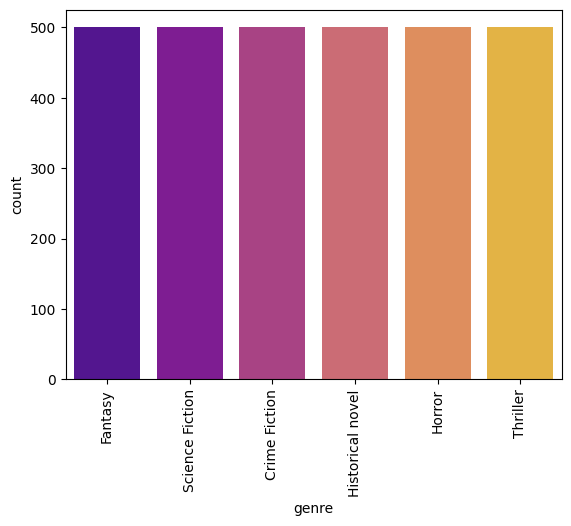

In [7]:
sns.countplot(x = books['genre'], palette='plasma')
plt.xticks(rotation='vertical')
# What a balance, every genre have 500 data 

In [8]:
books['summary'].iloc[1]
# There are unnecessary character here 

' As the book opens, Jason awakens on a school bus, unable to remember who or where he is, or anything about his past. He is sitting next to Piper McLean and Leo Valdez, who call him by name and say they are his girlfriend and best friend respectively. All three are part of a class field trip to the Grand Canyon, and after they arrive, a classmate Dylan turns into a Venti (Storm Spirit) and attacks the trio and their trip leader, Coach Gleeson Hedge. In the ensuing fight, Jason surprises everyone, including himself, when one of his coins turns into a sword which he uses to battle the storm spirits. Coach Hedge, who reveals himself to be a satyr during the fight, is taken captive by a fleeing spirit. After the battle, a flying chariot arrives to rescue the trio, but one of the people in it, Annabeth, is upset when she discovers that her missing boyfriend, Percy Jackson, is not there as she expected. Annabeth, seeking Percy, was told in a vision from the goddess Hera to look there for th

In [9]:
# make cleaning text function

def cleantext(text):
    # remove '\'
    text = re.sub(r'\\','',text)
    # removing special symbols 
    text = re.sub(r'[^a-zA-Z]',' ',text)
    # remove the whitespace
    text = ' '.join(text.split())
    # convert the lower case
    text = text.lower()
                  
    return text

In [10]:
# test the function
cleantext(' Hai im happy   ^  #$@$%@%    \\\\')
# THe function work good

'hai im happy'

In [11]:
books['summary'] = books['summary'].apply(lambda x:cleantext(x))

In [12]:
books['summary'][1] 

'as the book opens jason awakens on a school bus unable to remember who or where he is or anything about his past he is sitting next to piper mclean and leo valdez who call him by name and say they are his girlfriend and best friend respectively all three are part of a class field trip to the grand canyon and after they arrive a classmate dylan turns into a venti storm spirit and attacks the trio and their trip leader coach gleeson hedge in the ensuing fight jason surprises everyone including himself when one of his coins turns into a sword which he uses to battle the storm spirits coach hedge who reveals himself to be a satyr during the fight is taken captive by a fleeing spirit after the battle a flying chariot arrives to rescue the trio but one of the people in it annabeth is upset when she discovers that her missing boyfriend percy jackson is not there as she expected annabeth seeking percy was told in a vision from the goddess hera to look there for the guy with one shoe but this 

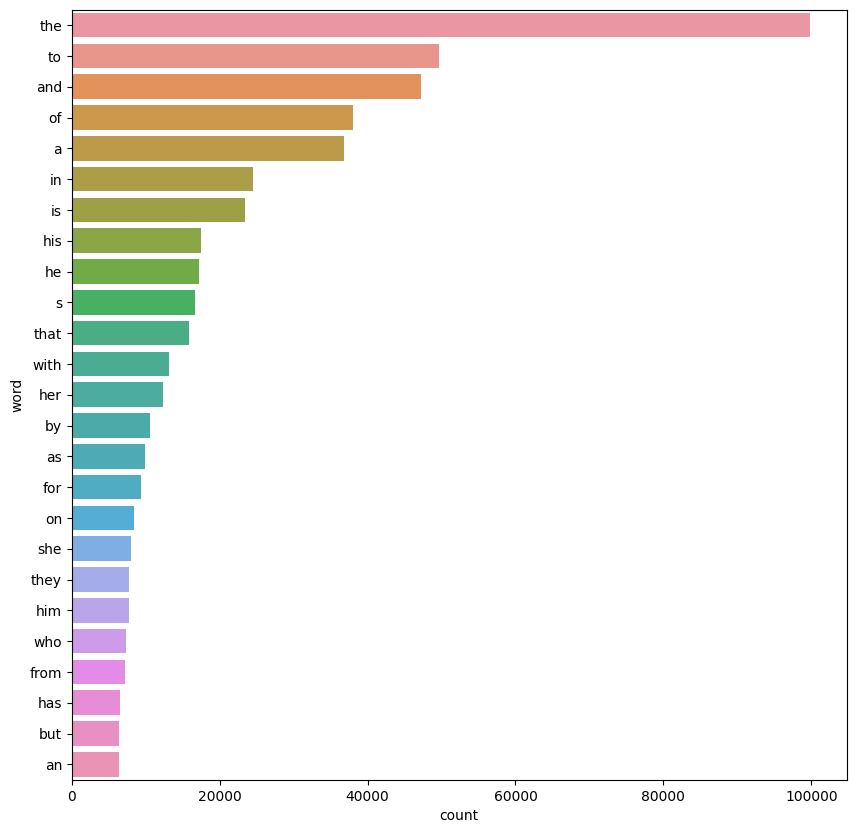

In [13]:
# Plotting the most drewuen words 

def showmostwords(text, no_of_words):
    allwords = ' '.join([char for char in text])
    allwords = allwords.split()
    fdist = nltk.FreqDist(allwords)
    
    wordsdf = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
    
    df = wordsdf.nlargest(columns='count', n = no_of_words)
    
    plt.figure(figsize=(10,10))
    
    ax = sns.barplot(data=df, x = 'count', y= 'word')
    ax.set(ylabel= 'word')
    
    plt.show()
    
    return wordsdf

# 25 most frequent words 

wordsdf = showmostwords(books['summary'], 25)

# This output is stop word, we dont want it, do not convey any kind of meaning 

In [14]:
  wordsdf.sort_values(by='count', ascending=False).head(10).style.background_gradient(cmap='plasma')

,word,count
3,the,99808
17,to,49665
14,and,47183
46,of,38003
23,a,36749
80,in,24496
2,is,23358
49,his,17464
51,he,17210
12,s,16710


In [15]:
# Removing Stop Words

nltk.download('stopwords')
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))

def removestopwords(text):
    removestopwords = [word for word in text.split() if word not in stop_words]
    return ' '.join(removestopwords)

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [16]:
# test
removestopwords('the meaning of life is nice and good')

'meaning life nice good'

In [17]:
# Use it in our datasets
books['summary'] = books['summary'].apply(lambda x:removestopwords(x))
books['summary'][0]

'drowned wednesday first trustee among morrow days arthur side wishes fulfilled appears leviathan whale suffers gluttony book begins leaf visiting arthur discussing invitation drowned wednesday sent arthur admitted hospital damage done leg attempted enter tuesday treasure tower suddenly hospital room becomes flooded water two transported border sea house leaf snatched away large ship green sails known flying mantis arthur remains bed medallion given immortal called mariner apparently fails summon help arthur without hope eventually buoy marking pirate elishar feverfew treasure floats toward soon arthur opens hand marked bloody red colour arthur red hand feverfew marks whoever found treasure identify later long scavenging ship called moth rescues arthur board arthur going name arth introduced sunscorch first mate captain catapillow journey brings line storms border sea later pursued feverfew ghostly ship shiver damage inflicted moth serious therefore sunscorch commands upper house sorce

In [18]:
# Lemmatizing
nltk.download('wordnet', download_dir='./')

from nltk.stem import WordNetLemmatizer

nltk.download("omw-1.4")

lemma = WordNetLemmatizer()


[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


In [19]:
def lematizing(sentence):
    stemSentence = ''
    for word in sentence.split():
        stem = lemma.lemmatize(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence =  stemSentence.strip()
    
    return stemSentence



In [20]:
lematizing('halo')

LookupError: 
**********************************************************************
  Resource 'corpora/wordnet' not found.  Please use the NLTK
  Downloader to obtain the resource:  >>> nltk.download()
  Searched in:
    - '/root/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************

In [21]:
# Approach with stemmer


from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stemming(sentence):
    stemmed_sentence = ''
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemmed_sentence+=stem
        stemmed_sentence+=' '
        
    stemmed_sentence = stemmed_sentence.strip()
    
    return stemmed_sentence

In [22]:
# Test the function
stemming('pyhton programmer')

'pyhton programm'

In [23]:
books['summary'] = books['summary'].apply(lambda text:stemming(text))

In [24]:
books['summary'][0]

'drown wednesday first truste among morrow day arthur side wish fulfil appear leviathan whale suffer gluttoni book begin leaf visit arthur discuss invit drown wednesday sent arthur admit hospit damag done leg attempt enter tuesday treasur tower suddenli hospit room becom flood water two transport border sea hous leaf snatch away larg ship green sail known fli manti arthur remain bed medallion given immort call marin appar fail summon help arthur without hope eventu buoy mark pirat elishar feverfew treasur float toward soon arthur open hand mark bloodi red colour arthur red hand feverfew mark whoever found treasur identifi later long scaveng ship call moth rescu arthur board arthur go name arth introduc sunscorch first mate captain catapillow journey bring line storm border sea later pursu feverfew ghostli ship shiver damag inflict moth seriou therefor sunscorch command upper hous sorcer dr scamandro open transfer portal elsewher secondari realm scamandro claim arthur carri someth inter

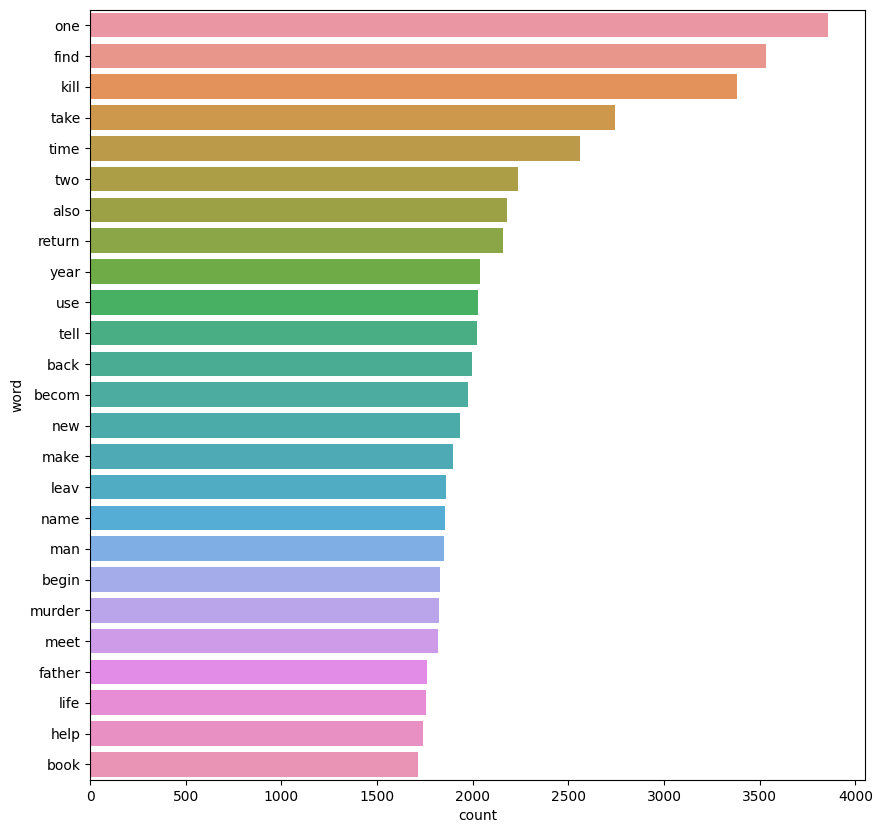

In [25]:
freq_df = showmostwords(books['summary'], 25)
# Now just meaningfull word left

In [26]:
freq_df.sort_values(by='count', ascending=False).head(10).style.background_gradient(cmap='plasma')

,word,count
242,one,3858
230,find,3533
240,kill,3380
153,take,2743
1144,time,2563
38,two,2235
415,also,2179
407,return,2158
734,year,2040
197,use,2026


In [28]:
# Encoding

In [32]:
books['genre'].unique().tolist()

['Fantasy',
 'Science Fiction',
 'Crime Fiction',
 'Historical novel',
 'Horror',
 'Thriller']

In [33]:
books_list = books['genre'].unique().tolist()
encode = [i for i in range(len(books_list))]
mapper = dict(zip(books_list, encode))
print(mapper)

{'Fantasy': 0, 'Science Fiction': 1, 'Crime Fiction': 2, 'Historical novel': 3, 'Horror': 4, 'Thriller': 5}


In [34]:
books['genre'] = books['genre'].map(mapper)
books['genre'].unique()
# Why use this method, becouse machine just understand numerical things

array([0, 1, 2, 3, 4, 5])

In [ ]:
# Model Building

In [35]:
# Count Vectorizer 

count_vec = CountVectorizer(max_df=0.90, min_df=2,
                           max_features=1000, stop_words='english')

bagofword_vec = count_vec.fit_transform(books['summary'])
bagofword_vec

<3000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 246049 stored elements in Compressed Sparse Row format>

In [36]:
test = books['genre']
X_train, X_test, y_train, y_test = train_test_split(bagofword_vec, test, test_size=0.2)

X_train.shape, X_test.shape

((2400, 1000), (600, 1000))

In [38]:
svc = SVC()
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(metrics.accuracy_score(y_test, svcpred))

0.5866666666666667


In [41]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
nbpred = nb.predict(X_test)
print(metrics.accuracy_score(y_test, nbpred))

0.6616666666666666


In [44]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rfpred = rf.predict(X_test)
print(metrics.accuracy_score(y_test, rfpred))

0.6333333333333333


In [ ]:
# No one good, lets try TFIDF then CounterVEctorize

In [49]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y  = le.fit_transform(books['genre'])

X_train, X_test, y_train, y_test = train_test_split(books['summary'],
                                                   y, test_size=0.2, random_state=557)
X_train.shape, X_test.shape

((2400,), (600,))

In [50]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train.values.astype('U'))
X_test_tfidf = tfidf_vectorizer.transform(X_test.values.astype('U'))

In [52]:
svc = SVC()
svc.fit(X_train_tfidf, y_train)
svcpred = svc.predict(X_test_tfidf)
print(metrics.accuracy_score(y_test, svcpred))

0.775


In [53]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
nbpred = nb.predict(X_test_tfidf)
print(metrics.accuracy_score(y_test, nbpred))

0.7716666666666666


In [55]:
rf = RandomForestClassifier()
rf.fit(X_train_tfidf, y_train)
rfpred = rf.predict(X_test_tfidf)
print(metrics.accuracy_score(y_test, rfpred))

0.6483333333333333


In [ ]:
# Better

In [ ]:
# Testing Model

In [ ]:
def test(text, model): 
    text = cleantext(text)
    text = removestopword
    text = stemming(text)
    
    text_vector = tfidf_vectorizer.transform([text])
    
    predicted = model.predict(text_vector)
    
    return metric.accuracy_score